In [1]:
from astropy.coordinates import SkyCoord
from astropy.io import ascii
from astropy.io import fits
from astropy.table import setdiff, Table, vstack
from astropy.wcs import WCS
from matplotlib.colors import LogNorm
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import os

328
323
5


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


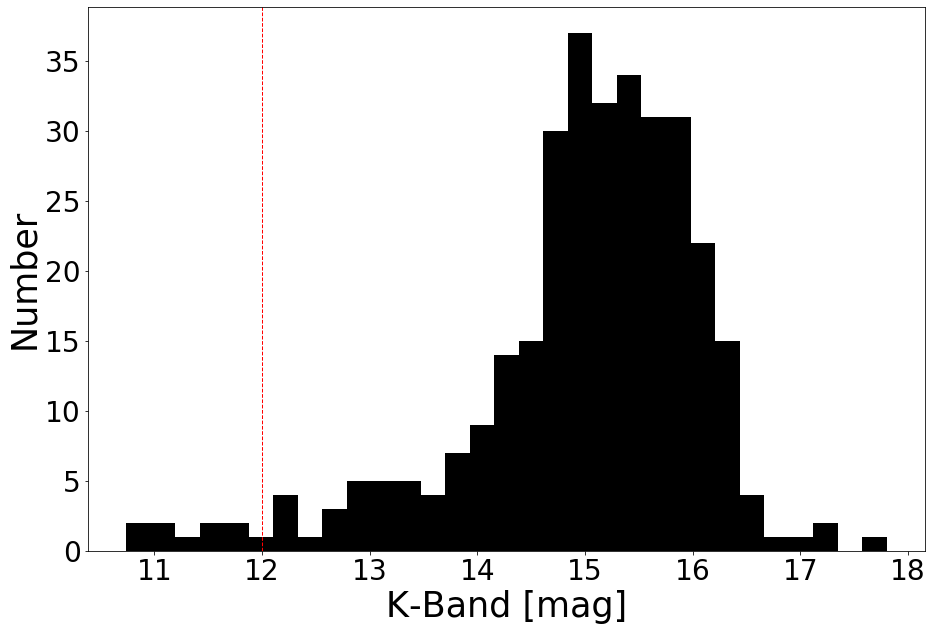

In [3]:
### PLOT THE K-BAND HISTOGRAM OF THE LIST OF CANDIDATES ###

candidates = ascii.read('/home/yobd/Documents/Selection/W-S-I+_Total_selection.dat')
rejected_candidates = ascii.read('/home/yobd/Documents/Selection/W-S-I+_Total_selection_rejected.dat')

candidates = vstack([candidates, rejected_candidates])
print(len(candidates))
candidates.remove_rows([candidates['ksAperMag3'] < - 100])
print(len(candidates))

rejected_no_k_band = setdiff(rejected_candidates, candidates, keys = ['ra', 'dec'])
print(len(rejected_no_k_band))
ascii.write(rejected_no_k_band, '/home/yobd/Documents/SourcesForAnalysis/rejected_no_k_band.dat', format = 'csv', overwrite = True)

plt.figure(1, figsize = (15, 10))
bin_number = np.int(np.absolute((np.amin(candidates['I_MAG_SUBARU']) - np.amax(candidates['I_MAG_SUBARU']) ) / 0.2))
plt.rc('xtick',labelsize = 28)
plt.rc('ytick',labelsize = 28)
n_all, bins, patches = plt.hist(candidates['ksAperMag3'], bins = bin_number, histtype = 'barstacked', color = 'black', label = 'Candidates')
plt.axvline(x = 12, color = 'r', linestyle = '--', linewidth = 1)
plt.xlabel("K-Band [mag]", fontsize = 35)
plt.ylabel("Number", fontsize = 35)
#plt.legend(fontsize = 30, loc = 2)
plt.show()

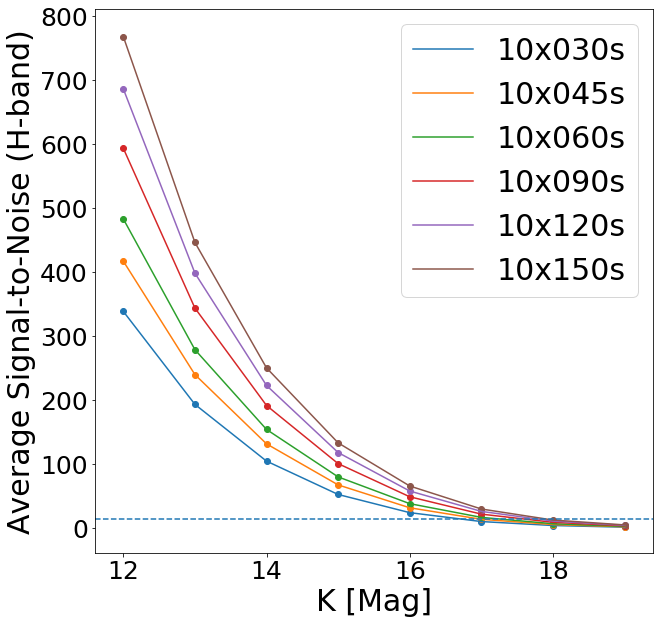

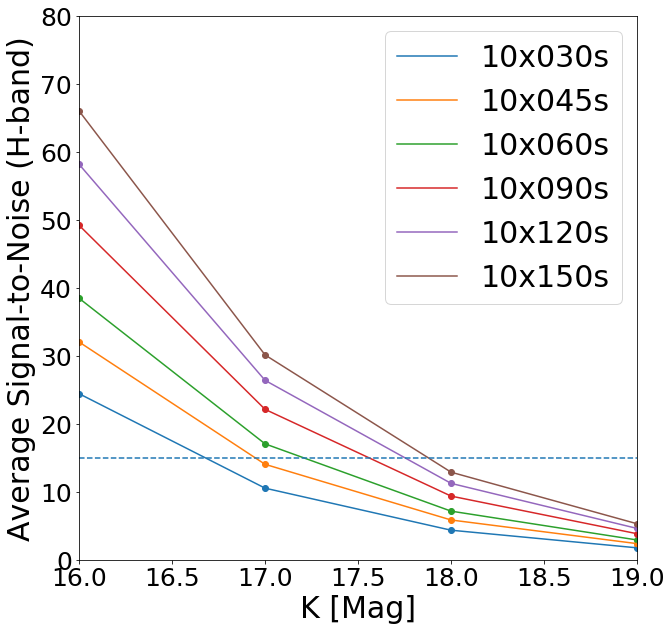

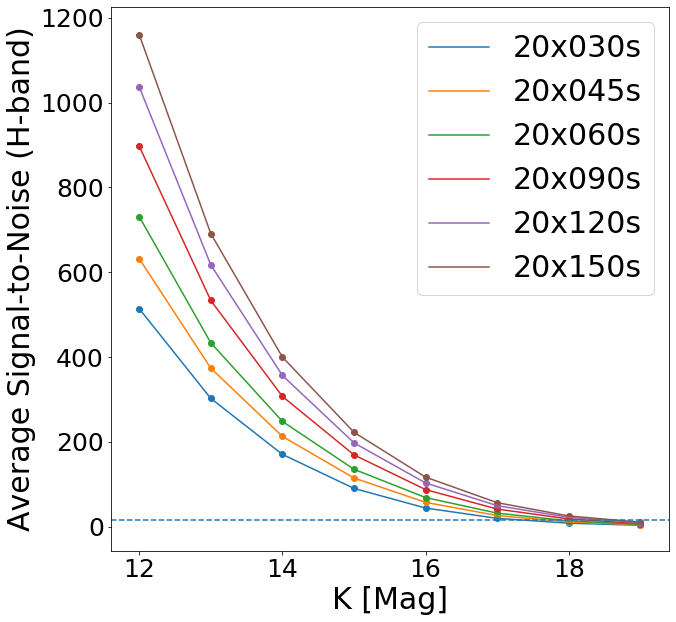

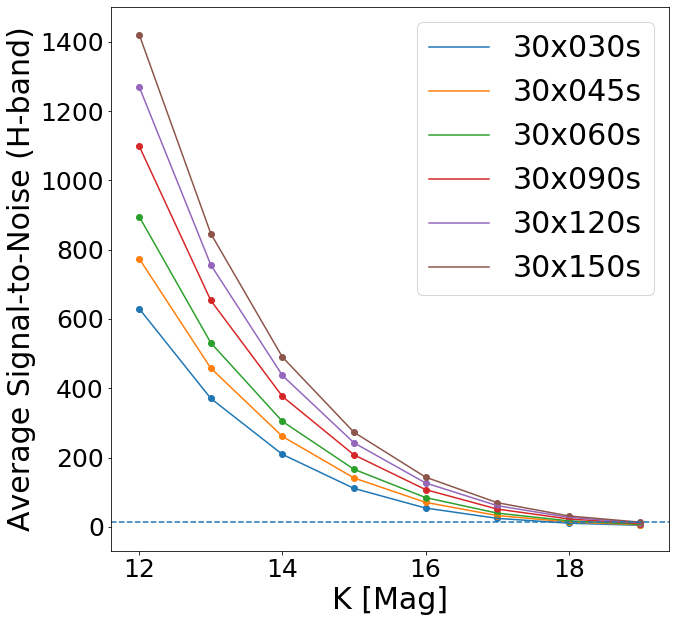

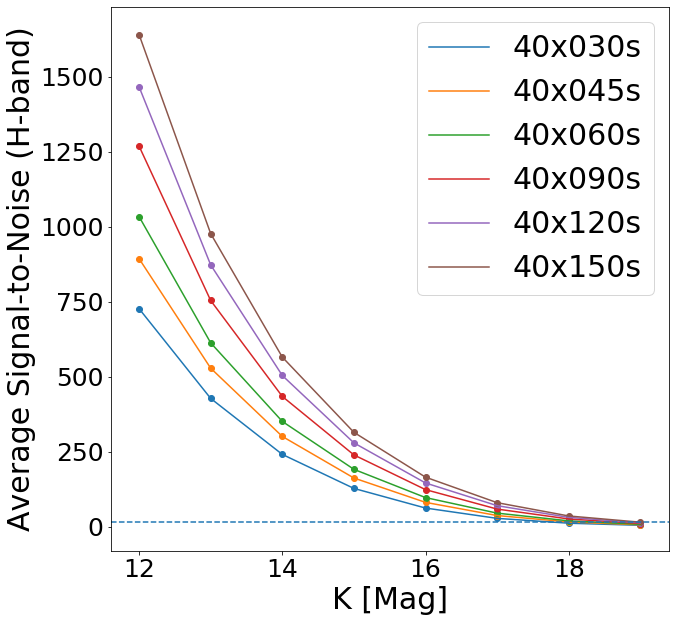

In [3]:
main_path = '/home/yobd/Documents/Karma_Prep/ETC/'

mags = []

cfgs = []

h_means = []

k_means = []

# Encodes the path of the dataset to be used by other OS methods
main_folder = os.fsencode(main_path)

for mag_item in os.listdir(main_folder):
    
    mag_item = os.fsdecode(mag_item) # Decodes the current item so it becomes a string
    
    mag_item_name = mag_item
    
    mag_item = main_path + mag_item + '/' # To comply with the func() function parameter
    
    mag_folder = os.fsencode(mag_item)
    
    for cfg_item in os.listdir(mag_folder):
        
        mags.append(mag_item_name)
        
        cfg_item = os.fsdecode(cfg_item)
        
        cfg_item_name = cfg_item
        
        cfgs.append(cfg_item_name)
        
        cfg_item = mag_item + cfg_item + '/'
        
        sn_path = cfg_item + 'plot_sn.dat'
        
        sn_cat = ascii.read(sn_path)
        
        h_band = sn_cat[sn_cat[0][:] < 1800]
        
        h_band_avg_sn = np.nanmean(h_band[1][:])
        
        h_means.append(h_band_avg_sn)
        
        k_band = sn_cat[sn_cat[0][:] > 2000]
        
        k_band = k_band[k_band[0][:] < 2300]
        
        k_band_avg_sn = np.nanmean(k_band[1][:])
        
        k_means.append(k_band_avg_sn)

data = Table()

data['KMag'] = mags

data['cfgs'] = cfgs

data['H_SN'] = h_means

data['K_SN'] = k_means

data['KMag_float'] = 12.

data['KMag_float'][data['KMag'] == 'K13'] = 13.

data['KMag_float'][data['KMag'] == 'K14'] = 14.

data['KMag_float'][data['KMag'] == 'K15'] = 15.

data['KMag_float'][data['KMag'] == 'K16'] = 16.

data['KMag_float'][data['KMag'] == 'K17'] = 17.

data['KMag_float'][data['KMag'] == 'K18'] = 18.

data['KMag_float'][data['KMag'] == 'K19'] = 19.

data.sort(['KMag', 'cfgs'])

## 10 x ##

ten_by_thirty = data[data['cfgs'] == '10x030']

ten_by_forty_five = data[data['cfgs'] == '10x045']

ten_by_sixty = data[data['cfgs'] == '10x060']

ten_by_ninety = data[data['cfgs'] == '10x090']

ten_by_one_twenty = data[data['cfgs'] == '10x120']

ten_by_one_fifty = data[data['cfgs'] == '10x150']

plt.rc('xtick',labelsize = 25)
plt.rc('ytick',labelsize = 25)

plt.figure(1, figsize = (10, 10))
#plt.scatter(data['KMag_float'], data['H_SN']) This was used when all NDIMs were being plotted on the same fig
plt.scatter(ten_by_thirty['KMag_float'], ten_by_thirty['H_SN'])
plt.scatter(ten_by_forty_five['KMag_float'], ten_by_forty_five['H_SN'])
plt.scatter(ten_by_sixty['KMag_float'], ten_by_sixty['H_SN'])
plt.scatter(ten_by_ninety['KMag_float'], ten_by_ninety['H_SN'])
plt.scatter(ten_by_one_twenty['KMag_float'], ten_by_one_twenty['H_SN'])
plt.scatter(ten_by_one_fifty['KMag_float'], ten_by_one_fifty['H_SN'])
plt.plot(ten_by_thirty['KMag_float'], ten_by_thirty['H_SN'], label = '10x030s')
plt.plot(ten_by_forty_five['KMag_float'], ten_by_forty_five['H_SN'], label = '10x045s')
plt.plot(ten_by_sixty['KMag_float'], ten_by_sixty['H_SN'], label = '10x060s')
plt.plot(ten_by_ninety['KMag_float'], ten_by_ninety['H_SN'], label = '10x090s')
plt.plot(ten_by_one_twenty['KMag_float'], ten_by_one_twenty['H_SN'], label = '10x120s')
plt.plot(ten_by_one_fifty['KMag_float'], ten_by_one_fifty['H_SN'], label = '10x150s')
plt.axhline(y = 15, linestyle = '--')
plt.xlabel('K [Mag]', fontsize = 30)
plt.ylabel('Average Signal-to-Noise (H-band)', fontsize = 30)
plt.legend(fontsize = 30, loc = 1)
plt.show()

plt.figure(2, figsize = (10, 10))
#plt.scatter(data['KMag_float'], data['H_SN']) This was used when all NDIMs were being plotted on the same fig
plt.scatter(ten_by_thirty['KMag_float'], ten_by_thirty['H_SN'])
plt.scatter(ten_by_forty_five['KMag_float'], ten_by_forty_five['H_SN'])
plt.scatter(ten_by_sixty['KMag_float'], ten_by_sixty['H_SN'])
plt.scatter(ten_by_ninety['KMag_float'], ten_by_ninety['H_SN'])
plt.scatter(ten_by_one_twenty['KMag_float'], ten_by_one_twenty['H_SN'])
plt.scatter(ten_by_one_fifty['KMag_float'], ten_by_one_fifty['H_SN'])
plt.plot(ten_by_thirty['KMag_float'], ten_by_thirty['H_SN'], label = '10x030s')
plt.plot(ten_by_forty_five['KMag_float'], ten_by_forty_five['H_SN'], label = '10x045s')
plt.plot(ten_by_sixty['KMag_float'], ten_by_sixty['H_SN'], label = '10x060s')
plt.plot(ten_by_ninety['KMag_float'], ten_by_ninety['H_SN'], label = '10x090s')
plt.plot(ten_by_one_twenty['KMag_float'], ten_by_one_twenty['H_SN'], label = '10x120s')
plt.plot(ten_by_one_fifty['KMag_float'], ten_by_one_fifty['H_SN'], label = '10x150s')
plt.axhline(y = 15, linestyle = '--')
plt.xlim(16, 19)
plt.ylim(0, 80)
plt.xlabel('K [Mag]', fontsize = 30)
plt.ylabel('Average Signal-to-Noise (H-band)', fontsize = 30)
plt.legend(fontsize = 30, loc = 1)
plt.show()

## 20 x ##

twenty_by_thirty = data[data['cfgs'] == '20x030']

twenty_by_forty_five = data[data['cfgs'] == '20x045']

twenty_by_sixty = data[data['cfgs'] == '20x060']

twenty_by_ninety = data[data['cfgs'] == '20x090']

twenty_by_one_twenty = data[data['cfgs'] == '20x120']

twenty_by_one_fifty = data[data['cfgs'] == '20x150']

plt.figure(3, figsize = (10, 10))
plt.scatter(twenty_by_thirty['KMag_float'], twenty_by_thirty['H_SN'])
plt.scatter(twenty_by_forty_five['KMag_float'], twenty_by_forty_five['H_SN'])
plt.scatter(twenty_by_sixty['KMag_float'], twenty_by_sixty['H_SN'])
plt.scatter(twenty_by_ninety['KMag_float'], twenty_by_ninety['H_SN'])
plt.scatter(twenty_by_one_twenty['KMag_float'], twenty_by_one_twenty['H_SN'])
plt.scatter(twenty_by_one_fifty['KMag_float'], twenty_by_one_fifty['H_SN'])
plt.plot(twenty_by_thirty['KMag_float'], twenty_by_thirty['H_SN'], label = '20x030s')
plt.plot(twenty_by_forty_five['KMag_float'], twenty_by_forty_five['H_SN'], label = '20x045s')
plt.plot(twenty_by_sixty['KMag_float'], twenty_by_sixty['H_SN'], label = '20x060s')
plt.plot(twenty_by_ninety['KMag_float'], twenty_by_ninety['H_SN'], label = '20x090s')
plt.plot(twenty_by_one_twenty['KMag_float'], twenty_by_one_twenty['H_SN'], label = '20x120s')
plt.plot(twenty_by_one_fifty['KMag_float'], twenty_by_one_fifty['H_SN'], label = '20x150s')
plt.axhline(y = 15, linestyle = '--')
plt.xlabel('K [Mag]', fontsize = 30)
plt.ylabel('Average Signal-to-Noise (H-band)', fontsize = 30)
plt.legend(fontsize = 30, loc = 1)
plt.show()

## 30 x ##

thirty_by_thirty = data[data['cfgs'] == '30x030']

thirty_by_forty_five = data[data['cfgs'] == '30x045']

thirty_by_sixty = data[data['cfgs'] == '30x060']

thirty_by_ninety = data[data['cfgs'] == '30x090']

thirty_by_one_twenty = data[data['cfgs'] == '30x120']

thirty_by_one_fifty = data[data['cfgs'] == '30x150']

plt.figure(4, figsize = (10, 10))
plt.scatter(thirty_by_thirty['KMag_float'], thirty_by_thirty['H_SN'])
plt.scatter(thirty_by_forty_five['KMag_float'], thirty_by_forty_five['H_SN'])
plt.scatter(thirty_by_sixty['KMag_float'], thirty_by_sixty['H_SN'])
plt.scatter(thirty_by_ninety['KMag_float'], thirty_by_ninety['H_SN'])
plt.scatter(thirty_by_one_twenty['KMag_float'], thirty_by_one_twenty['H_SN'])
plt.scatter(thirty_by_one_fifty['KMag_float'], thirty_by_one_fifty['H_SN'])
plt.plot(thirty_by_thirty['KMag_float'], thirty_by_thirty['H_SN'], label = '30x030s')
plt.plot(thirty_by_forty_five['KMag_float'], thirty_by_forty_five['H_SN'], label = '30x045s')
plt.plot(thirty_by_sixty['KMag_float'], thirty_by_sixty['H_SN'], label = '30x060s')
plt.plot(thirty_by_ninety['KMag_float'], thirty_by_ninety['H_SN'], label = '30x090s')
plt.plot(thirty_by_one_twenty['KMag_float'], thirty_by_one_twenty['H_SN'], label = '30x120s')
plt.plot(thirty_by_one_fifty['KMag_float'], thirty_by_one_fifty['H_SN'], label = '30x150s')
plt.axhline(y = 15, linestyle = '--')
plt.xlabel('K [Mag]', fontsize = 30)
plt.ylabel('Average Signal-to-Noise (H-band)', fontsize = 30)
plt.legend(fontsize = 30, loc = 1)
plt.show()

## 40 x ##

forty_by_thirty = data[data['cfgs'] == '40x030']

forty_by_forty_five = data[data['cfgs'] == '40x045']

forty_by_sixty = data[data['cfgs'] == '40x060']

forty_by_ninety = data[data['cfgs'] == '40x090']

forty_by_one_twenty = data[data['cfgs'] == '40x120']

forty_by_one_fifty = data[data['cfgs'] == '40x150']

plt.figure(5, figsize = (10, 10))
plt.scatter(forty_by_thirty['KMag_float'], forty_by_thirty['H_SN'])
plt.scatter(forty_by_forty_five['KMag_float'], forty_by_forty_five['H_SN'])
plt.scatter(forty_by_sixty['KMag_float'], forty_by_sixty['H_SN'])
plt.scatter(forty_by_ninety['KMag_float'], forty_by_ninety['H_SN'])
plt.scatter(forty_by_one_twenty['KMag_float'], forty_by_one_twenty['H_SN'])
plt.scatter(forty_by_one_fifty['KMag_float'], forty_by_one_fifty['H_SN'])
plt.plot(forty_by_thirty['KMag_float'], forty_by_thirty['H_SN'], label = '40x030s')
plt.plot(forty_by_forty_five['KMag_float'], forty_by_forty_five['H_SN'], label = '40x045s')
plt.plot(forty_by_sixty['KMag_float'], forty_by_sixty['H_SN'], label = '40x060s')
plt.plot(forty_by_ninety['KMag_float'], forty_by_ninety['H_SN'], label = '40x090s')
plt.plot(forty_by_one_twenty['KMag_float'], forty_by_one_twenty['H_SN'], label = '40x120s')
plt.plot(forty_by_one_fifty['KMag_float'], forty_by_one_fifty['H_SN'], label = '40x150s')
plt.axhline(y = 15, linestyle = '--')
plt.xlabel('K [Mag]', fontsize = 30)
plt.ylabel('Average Signal-to-Noise (H-band)', fontsize = 30)
plt.legend(fontsize = 30, loc = 1)
plt.show()

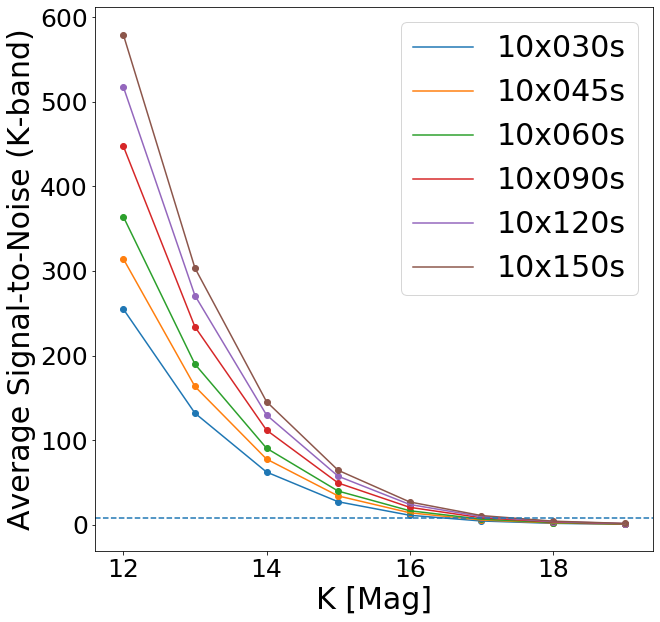

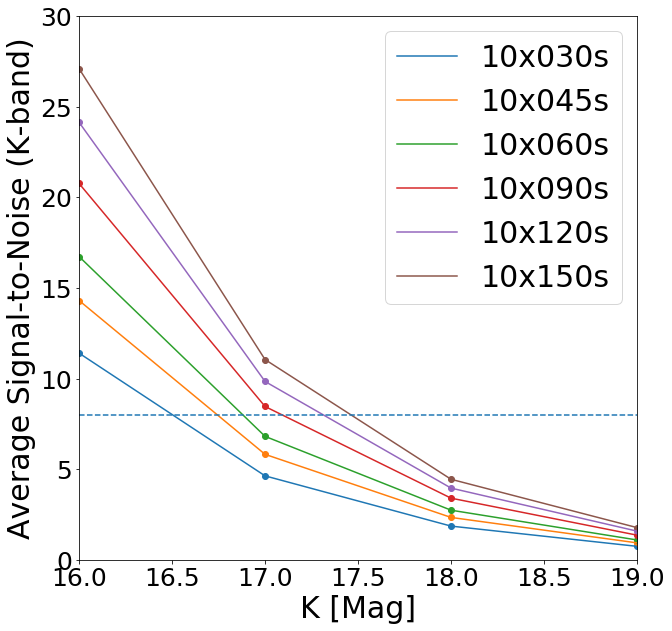

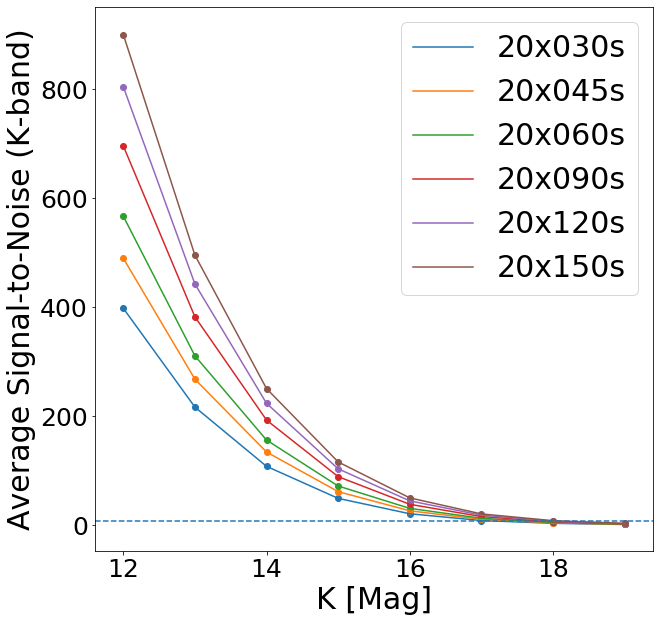

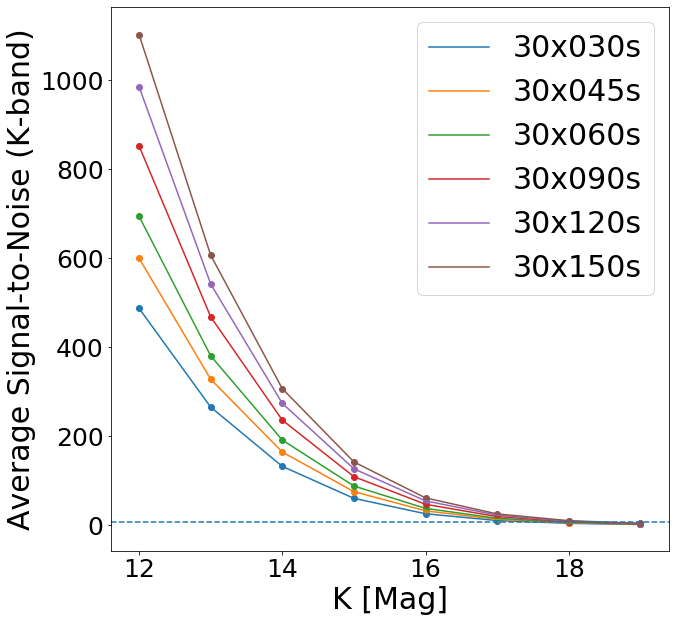

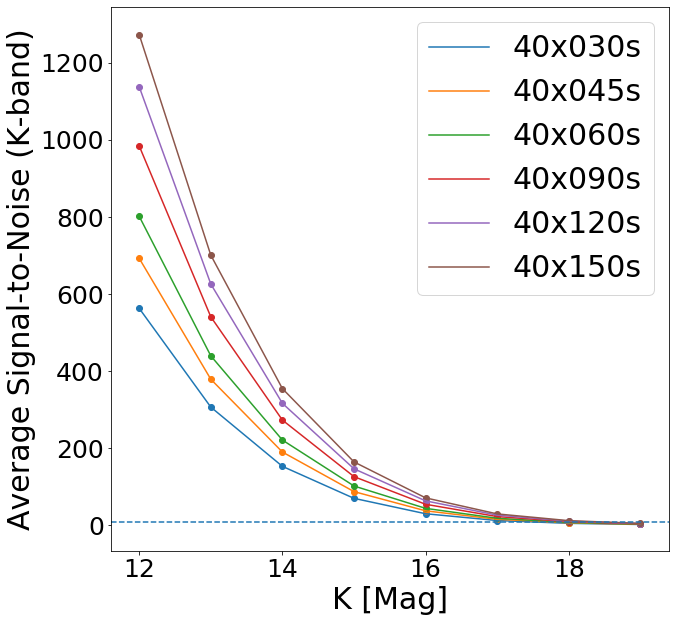

In [6]:
plt.figure(1, figsize = (10, 10))
#plt.scatter(data['KMag_float'], data['K_SN']) This was used when all NDIMs were being plotted on the same fig
plt.scatter(ten_by_thirty['KMag_float'], ten_by_thirty['K_SN'])
plt.scatter(ten_by_forty_five['KMag_float'], ten_by_forty_five['K_SN'])
plt.scatter(ten_by_sixty['KMag_float'], ten_by_sixty['K_SN'])
plt.scatter(ten_by_ninety['KMag_float'], ten_by_ninety['K_SN'])
plt.scatter(ten_by_one_twenty['KMag_float'], ten_by_one_twenty['K_SN'])
plt.scatter(ten_by_one_fifty['KMag_float'], ten_by_one_fifty['K_SN'])
plt.plot(ten_by_thirty['KMag_float'], ten_by_thirty['K_SN'], label = '10x030s')
plt.plot(ten_by_forty_five['KMag_float'], ten_by_forty_five['K_SN'], label = '10x045s')
plt.plot(ten_by_sixty['KMag_float'], ten_by_sixty['K_SN'], label = '10x060s')
plt.plot(ten_by_ninety['KMag_float'], ten_by_ninety['K_SN'], label = '10x090s')
plt.plot(ten_by_one_twenty['KMag_float'], ten_by_one_twenty['K_SN'], label = '10x120s')
plt.plot(ten_by_one_fifty['KMag_float'], ten_by_one_fifty['K_SN'], label = '10x150s')
plt.axhline(y = 8, linestyle = '--')
plt.xlabel('K [Mag]', fontsize = 30)
plt.ylabel('Average Signal-to-Noise (K-band)', fontsize = 30)
plt.legend(fontsize = 30, loc = 1)
plt.show()

plt.figure(2, figsize = (10, 10))
#plt.scatter(data['KMag_float'], data['K_SN']) This was used when all NDIMs were being plotted on the same fig
plt.scatter(ten_by_thirty['KMag_float'], ten_by_thirty['K_SN'])
plt.scatter(ten_by_forty_five['KMag_float'], ten_by_forty_five['K_SN'])
plt.scatter(ten_by_sixty['KMag_float'], ten_by_sixty['K_SN'])
plt.scatter(ten_by_ninety['KMag_float'], ten_by_ninety['K_SN'])
plt.scatter(ten_by_one_twenty['KMag_float'], ten_by_one_twenty['K_SN'])
plt.scatter(ten_by_one_fifty['KMag_float'], ten_by_one_fifty['K_SN'])
plt.plot(ten_by_thirty['KMag_float'], ten_by_thirty['K_SN'], label = '10x030s')
plt.plot(ten_by_forty_five['KMag_float'], ten_by_forty_five['K_SN'], label = '10x045s')
plt.plot(ten_by_sixty['KMag_float'], ten_by_sixty['K_SN'], label = '10x060s')
plt.plot(ten_by_ninety['KMag_float'], ten_by_ninety['K_SN'], label = '10x090s')
plt.plot(ten_by_one_twenty['KMag_float'], ten_by_one_twenty['K_SN'], label = '10x120s')
plt.plot(ten_by_one_fifty['KMag_float'], ten_by_one_fifty['K_SN'], label = '10x150s')
plt.axhline(y = 8, linestyle = '--')
plt.xlim(16, 19)
plt.ylim(0, 30)
plt.xlabel('K [Mag]', fontsize = 30)
plt.ylabel('Average Signal-to-Noise (K-band)', fontsize = 30)
plt.legend(fontsize = 30, loc = 1)
plt.show()

plt.figure(3, figsize = (10, 10))
plt.scatter(twenty_by_thirty['KMag_float'], twenty_by_thirty['K_SN'])
plt.scatter(twenty_by_forty_five['KMag_float'], twenty_by_forty_five['K_SN'])
plt.scatter(twenty_by_sixty['KMag_float'], twenty_by_sixty['K_SN'])
plt.scatter(twenty_by_ninety['KMag_float'], twenty_by_ninety['K_SN'])
plt.scatter(twenty_by_one_twenty['KMag_float'], twenty_by_one_twenty['K_SN'])
plt.scatter(twenty_by_one_fifty['KMag_float'], twenty_by_one_fifty['K_SN'])
plt.plot(twenty_by_thirty['KMag_float'], twenty_by_thirty['K_SN'], label = '20x030s')
plt.plot(twenty_by_forty_five['KMag_float'], twenty_by_forty_five['K_SN'], label = '20x045s')
plt.plot(twenty_by_sixty['KMag_float'], twenty_by_sixty['K_SN'], label = '20x060s')
plt.plot(twenty_by_ninety['KMag_float'], twenty_by_ninety['K_SN'], label = '20x090s')
plt.plot(twenty_by_one_twenty['KMag_float'], twenty_by_one_twenty['K_SN'], label = '20x120s')
plt.plot(twenty_by_one_fifty['KMag_float'], twenty_by_one_fifty['K_SN'], label = '20x150s')
plt.axhline(y = 8, linestyle = '--')
plt.xlabel('K [Mag]', fontsize = 30)
plt.ylabel('Average Signal-to-Noise (K-band)', fontsize = 30)
plt.legend(fontsize = 30, loc = 1)
plt.show()

plt.figure(4, figsize = (10, 10))
plt.scatter(thirty_by_thirty['KMag_float'], thirty_by_thirty['K_SN'])
plt.scatter(thirty_by_forty_five['KMag_float'], thirty_by_forty_five['K_SN'])
plt.scatter(thirty_by_sixty['KMag_float'], thirty_by_sixty['K_SN'])
plt.scatter(thirty_by_ninety['KMag_float'], thirty_by_ninety['K_SN'])
plt.scatter(thirty_by_one_twenty['KMag_float'], thirty_by_one_twenty['K_SN'])
plt.scatter(thirty_by_one_fifty['KMag_float'], thirty_by_one_fifty['K_SN'])
plt.plot(thirty_by_thirty['KMag_float'], thirty_by_thirty['K_SN'], label = '30x030s')
plt.plot(thirty_by_forty_five['KMag_float'], thirty_by_forty_five['K_SN'], label = '30x045s')
plt.plot(thirty_by_sixty['KMag_float'], thirty_by_sixty['K_SN'], label = '30x060s')
plt.plot(thirty_by_ninety['KMag_float'], thirty_by_ninety['K_SN'], label = '30x090s')
plt.plot(thirty_by_one_twenty['KMag_float'], thirty_by_one_twenty['K_SN'], label = '30x120s')
plt.plot(thirty_by_one_fifty['KMag_float'], thirty_by_one_fifty['K_SN'], label = '30x150s')
plt.axhline(y = 8, linestyle = '--')
plt.xlabel('K [Mag]', fontsize = 30)
plt.ylabel('Average Signal-to-Noise (K-band)', fontsize = 30)
plt.legend(fontsize = 30, loc = 1)
plt.show()

plt.figure(5, figsize = (10, 10))
plt.scatter(forty_by_thirty['KMag_float'], forty_by_thirty['K_SN'])
plt.scatter(forty_by_forty_five['KMag_float'], forty_by_forty_five['K_SN'])
plt.scatter(forty_by_sixty['KMag_float'], forty_by_sixty['K_SN'])
plt.scatter(forty_by_ninety['KMag_float'], forty_by_ninety['K_SN'])
plt.scatter(forty_by_one_twenty['KMag_float'], forty_by_one_twenty['K_SN'])
plt.scatter(forty_by_one_fifty['KMag_float'], forty_by_one_fifty['K_SN'])
plt.plot(forty_by_thirty['KMag_float'], forty_by_thirty['K_SN'], label = '40x030s')
plt.plot(forty_by_forty_five['KMag_float'], forty_by_forty_five['K_SN'], label = '40x045s')
plt.plot(forty_by_sixty['KMag_float'], forty_by_sixty['K_SN'], label = '40x060s')
plt.plot(forty_by_ninety['KMag_float'], forty_by_ninety['K_SN'], label = '40x090s')
plt.plot(forty_by_one_twenty['KMag_float'], forty_by_one_twenty['K_SN'], label = '40x120s')
plt.plot(forty_by_one_fifty['KMag_float'], forty_by_one_fifty['K_SN'], label = '40x150s')
plt.axhline(y = 8, linestyle = '--')
plt.xlabel('K [Mag]', fontsize = 30)
plt.ylabel('Average Signal-to-Noise (K-band)', fontsize = 30)
plt.legend(fontsize = 30, loc = 1)
plt.show()

Number of candidates in the field-of-view A: 41


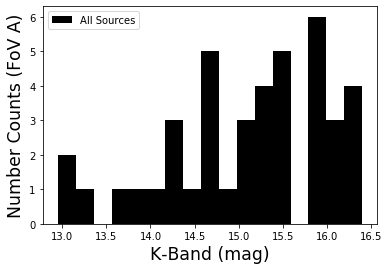

Number of candidates in the field-of-view B: 53


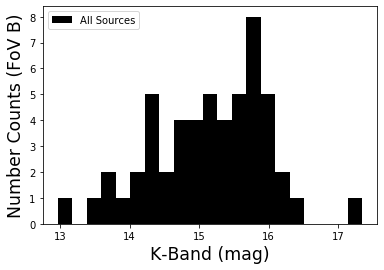

Number of candidates in the field-of-view C: 24


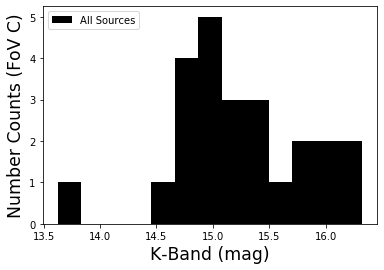

Number of candidates in the field-of-view D: 22


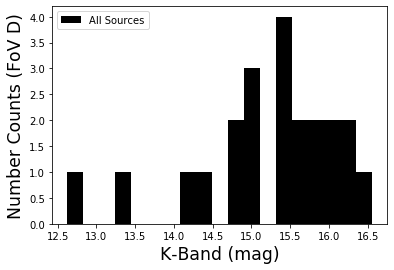

Number of candidates in the field-of-view E: 20


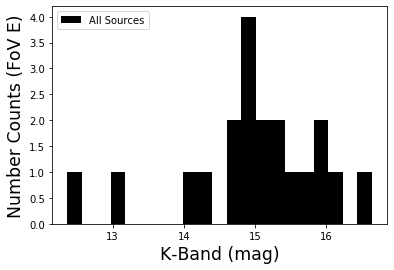

Number of candidates in the field-of-view F: 28


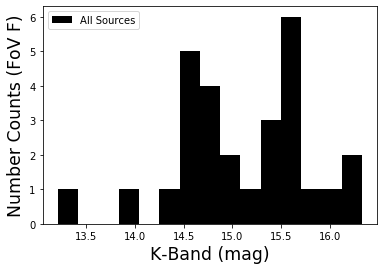

Number of candidates in the field-of-view G: 31


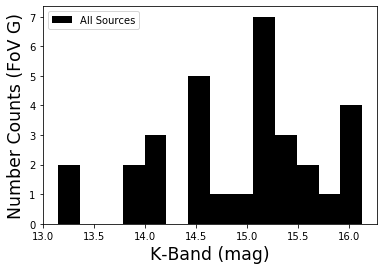

In [2]:
cat = ascii.read('/home/yobd/Documents/Selection/W-S-I+_Total_selection.dat')

co = SkyCoord(ra = cat['ra'].astype(float) * u.degree, dec = cat['dec'].astype(float) * u.degree)

fov_A = SkyCoord(ra = 285.7142443 * u.degree, dec = -37.0702128 * u.degree)

fov_B = SkyCoord(ra = 285.6461897 * u.degree, dec = -36.9783155 * u.degree)

fov_C = SkyCoord(ra = 285.5990377 * u.degree, dec = -37.1364681 * u.degree)

fov_D = SkyCoord(ra = 285.4702481 * u.degree, dec = -36.8738127 * u.degree)

fov_E = SkyCoord(ra = 285.3893672 * u.degree, dec = -37.0072980 * u.degree)

fov_F = SkyCoord(ra = 285.2954080 * u.degree, dec = -36.9095669 * u.degree)

fov_G = SkyCoord(ra = 285.1591031 * u.degree, dec = -36.9402423 * u.degree)

sep = 216.600 * u.arcsec

#idxsearcharound, idxself, sep2d, dist3d = co.search_around_sky(fov_A, sep)

fov_A_idx = co.separation(fov_A) < sep

fov_A_sources = cat[fov_A_idx]
print("Number of candidates in the field-of-view A:", len(fov_A_sources))
ascii.write(fov_A_sources, '/home/yobd/Documents/Karma_Prep/FoV_A.cat', format = 'csv', overwrite = True)

bin_number = np.int(np.absolute(( np.amin(fov_A_sources['ksAperMag3']) - np.amax(fov_A_sources['ksAperMag3']) ) / 0.2))

plt.figure(1)
n_all, bins, patches = plt.hist(fov_A_sources['ksAperMag3'], bins = bin_number, histtype = 'barstacked', color = 'black', label = 'All Sources')
plt.xlabel("K-Band (mag)", fontsize = 'xx-large')
plt.ylabel("Number Counts (FoV A)", fontsize = 'xx-large')
plt.legend(fontsize = 'medium', loc = 2)
plt.show()

fov_B_idx = co.separation(fov_B) < sep

fov_B_sources = cat[fov_B_idx]
print("Number of candidates in the field-of-view B:", len(fov_B_sources))
ascii.write(fov_B_sources, '/home/yobd/Documents/Karma_Prep/FoV_B.cat', format = 'csv', overwrite = True)

bin_number = np.int(np.absolute(( np.amin(fov_B_sources['ksAperMag3']) - np.amax(fov_B_sources['ksAperMag3']) ) / 0.2))

plt.figure(2)
n_all, bins, patches = plt.hist(fov_B_sources['ksAperMag3'], bins = bin_number, histtype = 'barstacked', color = 'black', label = 'All Sources')
plt.xlabel("K-Band (mag)", fontsize = 'xx-large')
plt.ylabel("Number Counts (FoV B)", fontsize = 'xx-large')
plt.legend(fontsize = 'medium', loc = 2)
plt.show()

fov_C_idx = co.separation(fov_C) < sep

fov_C_sources = cat[fov_C_idx]
print("Number of candidates in the field-of-view C:", len(fov_C_sources))
ascii.write(fov_C_sources, '/home/yobd/Documents/Karma_Prep/FoV_C.cat', format = 'csv', overwrite = True)

bin_number = np.int(np.absolute(( np.amin(fov_C_sources['ksAperMag3']) - np.amax(fov_C_sources['ksAperMag3']) ) / 0.2))

plt.figure(3)
n_all, bins, patches = plt.hist(fov_C_sources['ksAperMag3'], bins = bin_number, histtype = 'barstacked', color = 'black', label = 'All Sources')
plt.xlabel("K-Band (mag)", fontsize = 'xx-large')
plt.ylabel("Number Counts (FoV C)", fontsize = 'xx-large')
plt.legend(fontsize = 'medium', loc = 2)
plt.show()

fov_D_idx = co.separation(fov_D) < sep

fov_D_sources = cat[fov_D_idx]
print("Number of candidates in the field-of-view D:", len(fov_D_sources))
ascii.write(fov_D_sources, '/home/yobd/Documents/Karma_Prep/FoV_D.cat', format = 'csv', overwrite = True)

bin_number = np.int(np.absolute(( np.amin(fov_D_sources['ksAperMag3']) - np.amax(fov_D_sources['ksAperMag3']) ) / 0.2))

plt.figure(4)
n_all, bins, patches = plt.hist(fov_D_sources['ksAperMag3'], bins = bin_number, histtype = 'barstacked', color = 'black', label = 'All Sources')
plt.xlabel("K-Band (mag)", fontsize = 'xx-large')
plt.ylabel("Number Counts (FoV D)", fontsize = 'xx-large')
plt.legend(fontsize = 'medium', loc = 2)
plt.show()

fov_E_idx = co.separation(fov_E) < sep

fov_E_sources = cat[fov_E_idx]
print("Number of candidates in the field-of-view E:", len(fov_E_sources))
ascii.write(fov_E_sources, '/home/yobd/Documents/Karma_Prep/FoV_E.cat', format = 'csv', overwrite = True)

bin_number = np.int(np.absolute(( np.amin(fov_E_sources['ksAperMag3']) - np.amax(fov_E_sources['ksAperMag3']) ) / 0.2))

plt.figure(5)
n_all, bins, patches = plt.hist(fov_E_sources['ksAperMag3'], bins = bin_number, histtype = 'barstacked', color = 'black', label = 'All Sources')
plt.xlabel("K-Band (mag)", fontsize = 'xx-large')
plt.ylabel("Number Counts (FoV E)", fontsize = 'xx-large')
plt.legend(fontsize = 'medium', loc = 2)

plt.show()

fov_F_idx = co.separation(fov_F) < sep

fov_F_sources = cat[fov_F_idx]
print("Number of candidates in the field-of-view F:", len(fov_F_sources))
ascii.write(fov_F_sources, '/home/yobd/Documents/Karma_Prep/FoV_F.cat', format = 'csv', overwrite = True)

bin_number = np.int(np.absolute(( np.amin(fov_F_sources['ksAperMag3']) - np.amax(fov_F_sources['ksAperMag3']) ) / 0.2))

plt.figure(6)
n_all, bins, patches = plt.hist(fov_F_sources['ksAperMag3'], bins = bin_number, histtype = 'barstacked', color = 'black', label = 'All Sources')
plt.xlabel("K-Band (mag)", fontsize = 'xx-large')
plt.ylabel("Number Counts (FoV F)", fontsize = 'xx-large')
plt.legend(fontsize = 'medium', loc = 2)

plt.show()

fov_G_idx = co.separation(fov_G) < sep

fov_G_sources = cat[fov_G_idx]
print("Number of candidates in the field-of-view G:", len(fov_G_sources))
ascii.write(fov_G_sources, '/home/yobd/Documents/Karma_Prep/FoV_G.cat', format = 'csv', overwrite = True)

bin_number = np.int(np.absolute(( np.amin(fov_G_sources['ksAperMag3']) - np.amax(fov_G_sources['ksAperMag3']) ) / 0.2))

plt.figure(7)
n_all, bins, patches = plt.hist(fov_G_sources['ksAperMag3'], bins = bin_number, histtype = 'barstacked', color = 'black', label = 'All Sources')
plt.xlabel("K-Band (mag)", fontsize = 'xx-large')
plt.ylabel("Number Counts (FoV G)", fontsize = 'xx-large')
plt.legend(fontsize = 'medium', loc = 2)

plt.show()

109
107


/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


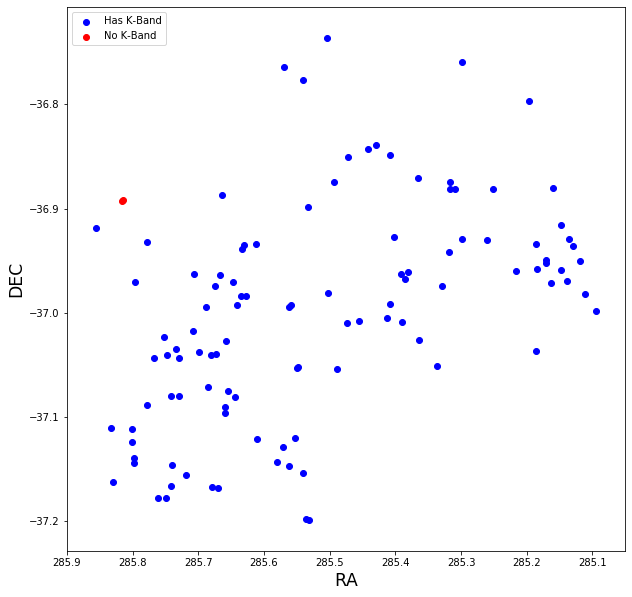

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


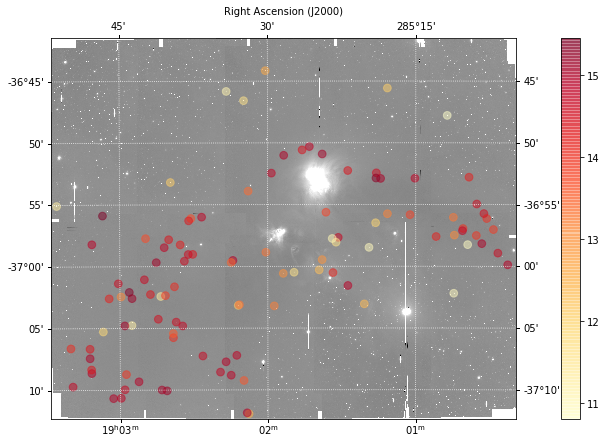

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


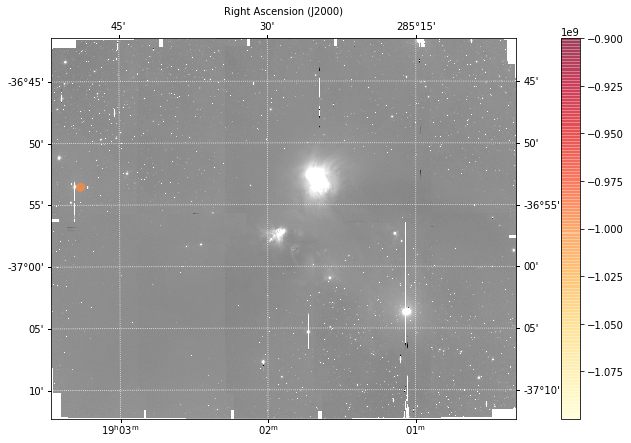

In [5]:
temp_cat = Table.copy(cat)
print(len(cat))
cat.remove_rows([cat['ksAperMag3'] > 100])

cat.remove_rows([cat['ksAperMag3'] < - 100])
print(len(cat))
cat_no_ks = setdiff(temp_cat, cat, keys = ['ra', 'dec'])

#Opens the .fits file
hdu = fits.open('/home/yobd/Documents/AstroAliSciObj/Montaged_Filters/W-S-I+_Montaged_Median/W-S-I+_Median_Montaged_Mosaic.fits')

#Variable for the header of the fits
head = hdu[0].header

#Variable for the image of the fits
im = hdu[0].data

wcs_head = WCS(head)

xpix = np.linspace(0, len(im[0]), len(im[0]))

ypix = np.linspace(0, len(im[1]), len(im[1]))

wx, wy = wcs_head.wcs_pix2world(xpix, ypix, 1)

ra_2_pix, dec_2_pix = wcs_head.all_world2pix(cat['ra'], cat['dec'], 1)

ra_2_pix_2, dec_2_pix_2 = wcs_head.all_world2pix(cat_no_ks['ra'], cat_no_ks['dec'], 1)

plt.figure(1, figsize = (10, 10))
plt.scatter(cat['ra'], cat['dec'], color = 'blue', label = 'Has K-Band')
plt.scatter(cat_no_ks['ra'], cat_no_ks['dec'], color = 'red', label = 'No K-Band')
plt.xlabel("RA", fontsize = 'xx-large')
plt.ylabel("DEC", fontsize = 'xx-large')
plt.legend(fontsize = 'medium', loc = 2)
plt.gca().invert_xaxis()
plt.show()

plt.figure(2, figsize = (16, 7))
ax = plt.subplot(projection=wcs_head)
ax.imshow(im, cmap = 'gray', norm=LogNorm(vmin=1000, vmax=3000))
#plt.colorbar()
#c = ax.scatter(cross_match_c_t_h_alpha['ra'][in_box], cross_match_c_t_h_alpha['dec'][in_box], c = cross_match_c_t_h_alpha['EXT'][in_box], edgecolor = None, s = 60, alpha = 0.5, cmap = plt.cm.YlOrRd, zorder = 1, label = 'Extinction')
c = ax.scatter(ra_2_pix, dec_2_pix, c = cat['ksAperMag3'], edgecolor = None, s = 60, alpha = 0.5, cmap = plt.cm.YlOrRd, zorder = 1, label = 'K-Mag')
plt.colorbar(c)
overlay = ax.get_coords_overlay('icrs')
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Right Ascension (J2000)')
overlay[1].set_axislabel('Declination (J2000)')
plt.show()

plt.figure(3, figsize = (16, 7))
ax = plt.subplot(projection=wcs_head)
ax.imshow(im, cmap = 'gray', norm=LogNorm(vmin=1000, vmax=3000))
#plt.colorbar()
#c = ax.scatter(cross_match_c_t_h_alpha['ra'][in_box], cross_match_c_t_h_alpha['dec'][in_box], c = cross_match_c_t_h_alpha['EXT'][in_box], edgecolor = None, s = 60, alpha = 0.5, cmap = plt.cm.YlOrRd, zorder = 1, label = 'Extinction')
c = ax.scatter(ra_2_pix_2, dec_2_pix_2, c = cat_no_ks['ksAperMag3'], edgecolor = None, s = 60, alpha = 0.5, cmap = plt.cm.YlOrRd, zorder = 1, label = 'K-Mag')
plt.colorbar(c)
overlay = ax.get_coords_overlay('icrs')
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Right Ascension (J2000)')
overlay[1].set_axislabel('Declination (J2000)')
plt.show()